<a href="https://colab.research.google.com/github/TheAgaveFairy/MusicGeneration/blob/main/GAMEEMO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sigfest/database-for-emotion-recognition-system-gameemo")
print("Path to dataset files:", path)

100%|██████████| 1.70G/1.70G [00:18<00:00, 99.8MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/sigfest/database-for-emotion-recognition-system-gameemo/versions/1


In [34]:
def list_files(startpath, trunc=True):
    print(f"root path is:\n{path}\nbeginning walk:")
    for root, dirs, files in os.walk(startpath):
        level = root.replace(startpath, '').count(os.sep)
        indent = ' ' * 4 * (level)
        print('{}{}/'.format(indent, os.path.basename(root)))
        subindent = ' ' * 4 * (level + 1)
        if trunc:
            files = files[:2]
        for f in files:
            print('{}{}'.format(subindent, f))
if False:
  list_files(path)

In [19]:
random_subject_id = random.randint(1,28)
print(f"random subject id: {random_subject_id}")
path_to_subject = os.path.join(path, f"GAMEEMO/(S{random_subject_id:02})/Raw EEG Data/.csv format/")
print(f"path to subject: {path_to_subject}")

random subject id: 6
path to subject: /root/.cache/kagglehub/datasets/sigfest/database-for-emotion-recognition-system-gameemo/versions/1/GAMEEMO/(S06)/Raw EEG Data/.csv format/


In [28]:
for csv_filename in os.listdir(path_to_subject): # get some csv file from the dir
  path_to_file = os.path.join(path_to_subject, csv_filename)
  df = pd.read_csv(path_to_file)
  print(path_to_file, df.head(2))

/root/.cache/kagglehub/datasets/sigfest/database-for-emotion-recognition-system-gameemo/versions/1/GAMEEMO/(S06)/Raw EEG Data/.csv format/S06G2AllRawChannels.csv        AF3      AF4        F3       F4       F7       F8      FC5     FC6  \
0   3.8462 -25.8977 -174.1028 -3.33350   9.4868 -22.8208   4.8716  4.3589   
1  13.5898 -32.0513 -168.4614 -0.76904  15.6411 -22.8206  14.1025  7.9487   

        O1       O2       P7      P8       T7       T8  Unnamed: 14  
0  0.25635 -0.25635  21.7949 -5.3848  10.0000 -39.7437          NaN  
1 -2.30760  0.76904  23.3335 -4.3589  15.6411 -37.6921          NaN  


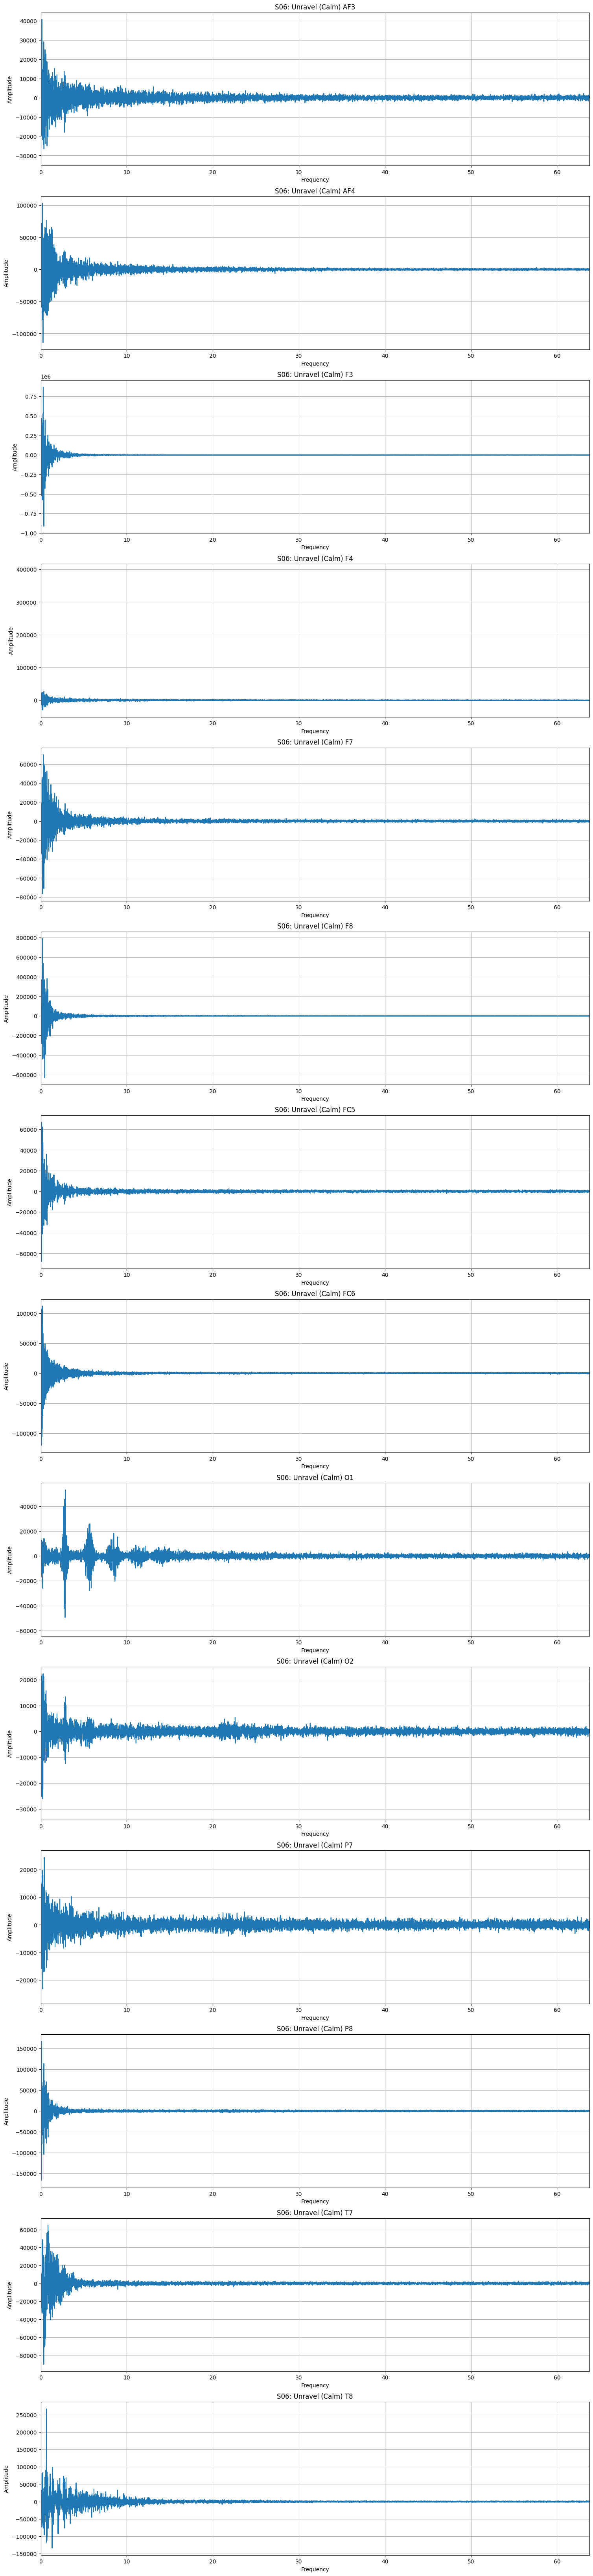

In [58]:
LENGTH_OF_SAMPLE_IN_SECONDS = 300
NUM_ROWS = len(df)
SAMPLE_RATE = NUM_ROWS / LENGTH_OF_SAMPLE_IN_SECONDS

GAME_NAMES = ['Train Sim World (Boring)', 'Unravel (Calm)', 'Slender - The Arrival (Horror)', 'Goat Simulator (Funny)']
current_game = GAME_NAMES[(int(csv_filename[4]) - 1)]

wanted_cols = [col for col in df.columns if 'Unnamed' not in col]

fig, axes = plt.subplots(len(wanted_cols), 1, figsize=(18, len(wanted_cols) * 6))

for i, col in enumerate(wanted_cols):
  eeg_array = df[col]
  eeg_fft = np.fft.rfft(eeg_array)
  frequencies = np.fft.fftfreq(eeg_fft.size, d = 1.0/SAMPLE_RATE)
  axes[i].plot(frequencies, eeg_fft)
  #axes[i].plot(eeg_array)
  axes[i].set_title(f'S{random_subject_id:02}: {current_game} {col}')
  axes[i].set_xlabel('Frequency')
  axes[i].set_ylabel('Amplitude')
  axes[i].grid(True)
  axes[i].set_xlim(0, SAMPLE_RATE / 2)
plt.show()
